<a href="https://colab.research.google.com/github/psukphranee/Python-Practice/blob/master/SAR_scratch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import scipy.sparse as sp

#A. LFM Pulse

This section goes through the rundown of generating an LFM pulse. Dummy values are used. We define and visualize the pulse envelope and chirp separately and then we combine them by multiplying them together. 

### $P(t) = \chi_{\tau}(t) e^{j 2 \pi (f_c t + \frac{1}{2}k t^2)}$. (cite Cheney Here)

$\chi_{\tau}(t)$ piecewise function describing pulse envelope

$f_c$ = carrier frequency

$k$ = chirp rate


In [12]:
def generate_LFM_Pulse(time_array, pulse_width, pulse_height, chirp_rate=1, carrier_frequency=100):
  
  #time ---------------
  t = time_array

  #pulse envelope  ---------------
  A = pulse_height;
  tau = pulse_width; 
  tau_half = tau/2;

  chi = A * (np.abs((t-tau_half)/tau_half) <= 1);
  #chi = generate_pulse_envelope(t, pulse_height, pulse_width);

  #LFM  ---------------
  k = chirp_rate
  f_c = carrier_frequency

  #argument to be passed to exponenetial 
  exp_arg = 2j*np.pi*(f_c*t + .5*k*(t**2))
  LFM = np.exp(exp_arg);

  pulse = chi*LFM
  return pulse

def plot_pulse(time, pulse, fig, ax, **kwargs):
  t=time;
  pulse=pulse;

  ax.plot(t, np.real(pulse), alpha=0.4, *kwargs)
  plt.xlim([t[0],t[-1]])
  plt.show()

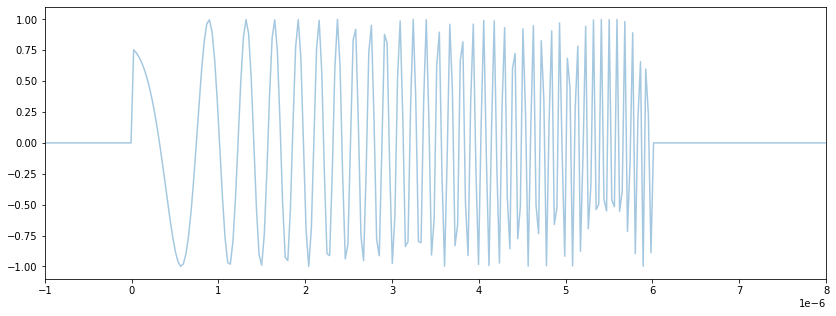

In [95]:
PRF = 500 #GHz
tau = 6e-6 #seconds
f_c = 1e10
bandwidth = 20 #Ghz
k = 2e12

t = np.linspace(-1e-6,8e-6, 300)

pulse = generate_LFM_Pulse(t, pulse_width=tau, pulse_height=1, carrier_frequency=f_c, chirp_rate=k )
# pulse2 = generate_LFM_Pulse(t, 1, 1, 20, 1e9)
# pulse3 = generate_LFM_Pulse(t, 2, 1, 20, 1e9)

fig, ax = plt.subplots(figsize=(14,5))
plot_pulse(t, pulse, fig=fig, ax=ax)

#B. Convolution as a Matrix



1.   Create Identity Matrix, A, of dimension NxN
2.   Determine interval of elements to sample, Di
3.   Create the Convolution Matrix, B, consisting of zeros and dimension NxN
4.   Loop through and shift each rows of identity matrix A by amount Di along. Add the result of this shift to B.
5.   Return upper triangular part of B.



##1. Code Outline

In [137]:
N = 10#pulse.shape[0]
Di = 4

A = np.eye(N)
Convolution_Matrix = np.zeros((N, N))

for i in range(0, N, Di):
  Convolution_Matrix = Convolution_Matrix + np.roll(A, i, axis=1)

Convolution_Matrix = np.triu(Convolution_Matrix)

##2. 